# 3-5 프로젝트 : 고양이 수염 스티커 만들기

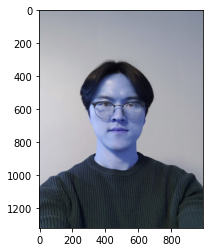

In [ ]:
# Step1. 데이터 준비


# 모듈 임포트
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib


  # 데이터 로드
my_image_path = '/content/drive/MyDrive/LMS 실습자료/20220111_183410_resized_1.jpg'
img_bgr = cv2.imread(my_image_path)
img_show = img_bgr.copy()
plt.imshow(img_bgr)
plt.show()



rectangles[[(290, 461) (675, 846)]]


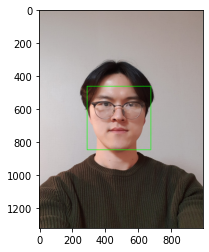

68


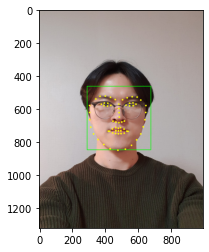

In [ ]:
# Step2. 얼굴 검출 & 랜드마크 검출

# detector 선언
detector_hog = dlib.get_frontal_face_detector()

# 얼굴 bounding box 추출
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)
print(dlib_rects)     

# bounding box와 사진 합치기
for dlib_rect in dlib_rects: 
  l = dlib_rect.left()
  t = dlib_rect.top()
  r = dlib_rect.right()
  b = dlib_rect.bottom()
  cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)  
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()


# 데이터 불러오기 및 landmark_predictor 선언
model_path = "/content/drive/MyDrive/LMS 실습자료/shape_predictor_68_face_landmarks.dat"
landmark_predictor = dlib.shape_predictor(model_path)


# face landmark 찾은 후 좌표를 리스트에 저장

list_landmarks = []

for dlib_rect in dlib_rects:
  points = landmark_predictor(img_rgb,dlib_rect)

  # face landmark 좌표를 저장
  list_points = list(map(lambda p: (p.x,p.y), points.parts()))
  list_landmarks.append(list_points)

print(len(list_landmarks[0]))

  # landmark 출력
for landmarks in list_landmarks:
  for point in landmarks : 
    cv2.circle(img_show, point, 5, (0,255,255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()



In [ ]:
# Step3. 스티커 적용 위치 확인하기

# 좌표 확인하기


for dlib_rect, landmark in zip(dlib_rects, list_landmarks) :
  print(landmark[33])
  x = landmark[33][0]
  y = landmark[33][1]
  w = h = dlib_rect.width()
  print('(x,y) : (%d,%d)'%(x,y))
  print('(w,h) : (%d,%d)'%(w,h))


# 스티커 이미지 로드 & 사이즈 변경
sticker_path = "/content/drive/MyDrive/LMS 실습자료/cat-whiskers.png"
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))

# 스티커 이미지 위치 변경
refined_x = x - w//2
refined_y = y - h//2
print ('(refined_x,refined_y) : (%d,%d)'%(refined_x, refined_y))


(482, 682)
(x,y) : (482,682)
(w,h) : (386,386)
(refined_x,refined_y) : (289,489)


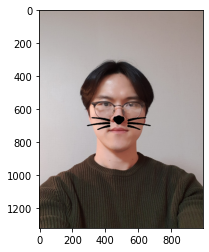

In [ ]:
# Step4. 스티커 적용하기
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,img_sticker,sticker_area).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()
